## Librerias

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Base de datos

[Character Interaction Networks for the HBO Series "Game of Thrones"](https://github.com/mathbeveridge/gameofthrones)

These networks were created by parsing fan-generated scripts from https://genius.com/artists/Game-of-thrones. Pairs of characters are connected by (undirected) edges weighted by the number of interactions.

There are five interaction types. Character A and Character B are connected whenever:

1. Character A speaks directly after Character B
2. Character A speaks about Character B
3. Character C speaks about Character A and Character B
4. Character A and Character B are mentioned in the same stage direction
5. Character A and Character B appear in a scene together

In [ ]:
file_path = '/content/drive/MyDrive/MatApl/26-1 Ayudantias/Redes Complejas/Clases/got-s1-edges.csv'
df = pd.read_csv(file_path)
df.head()

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


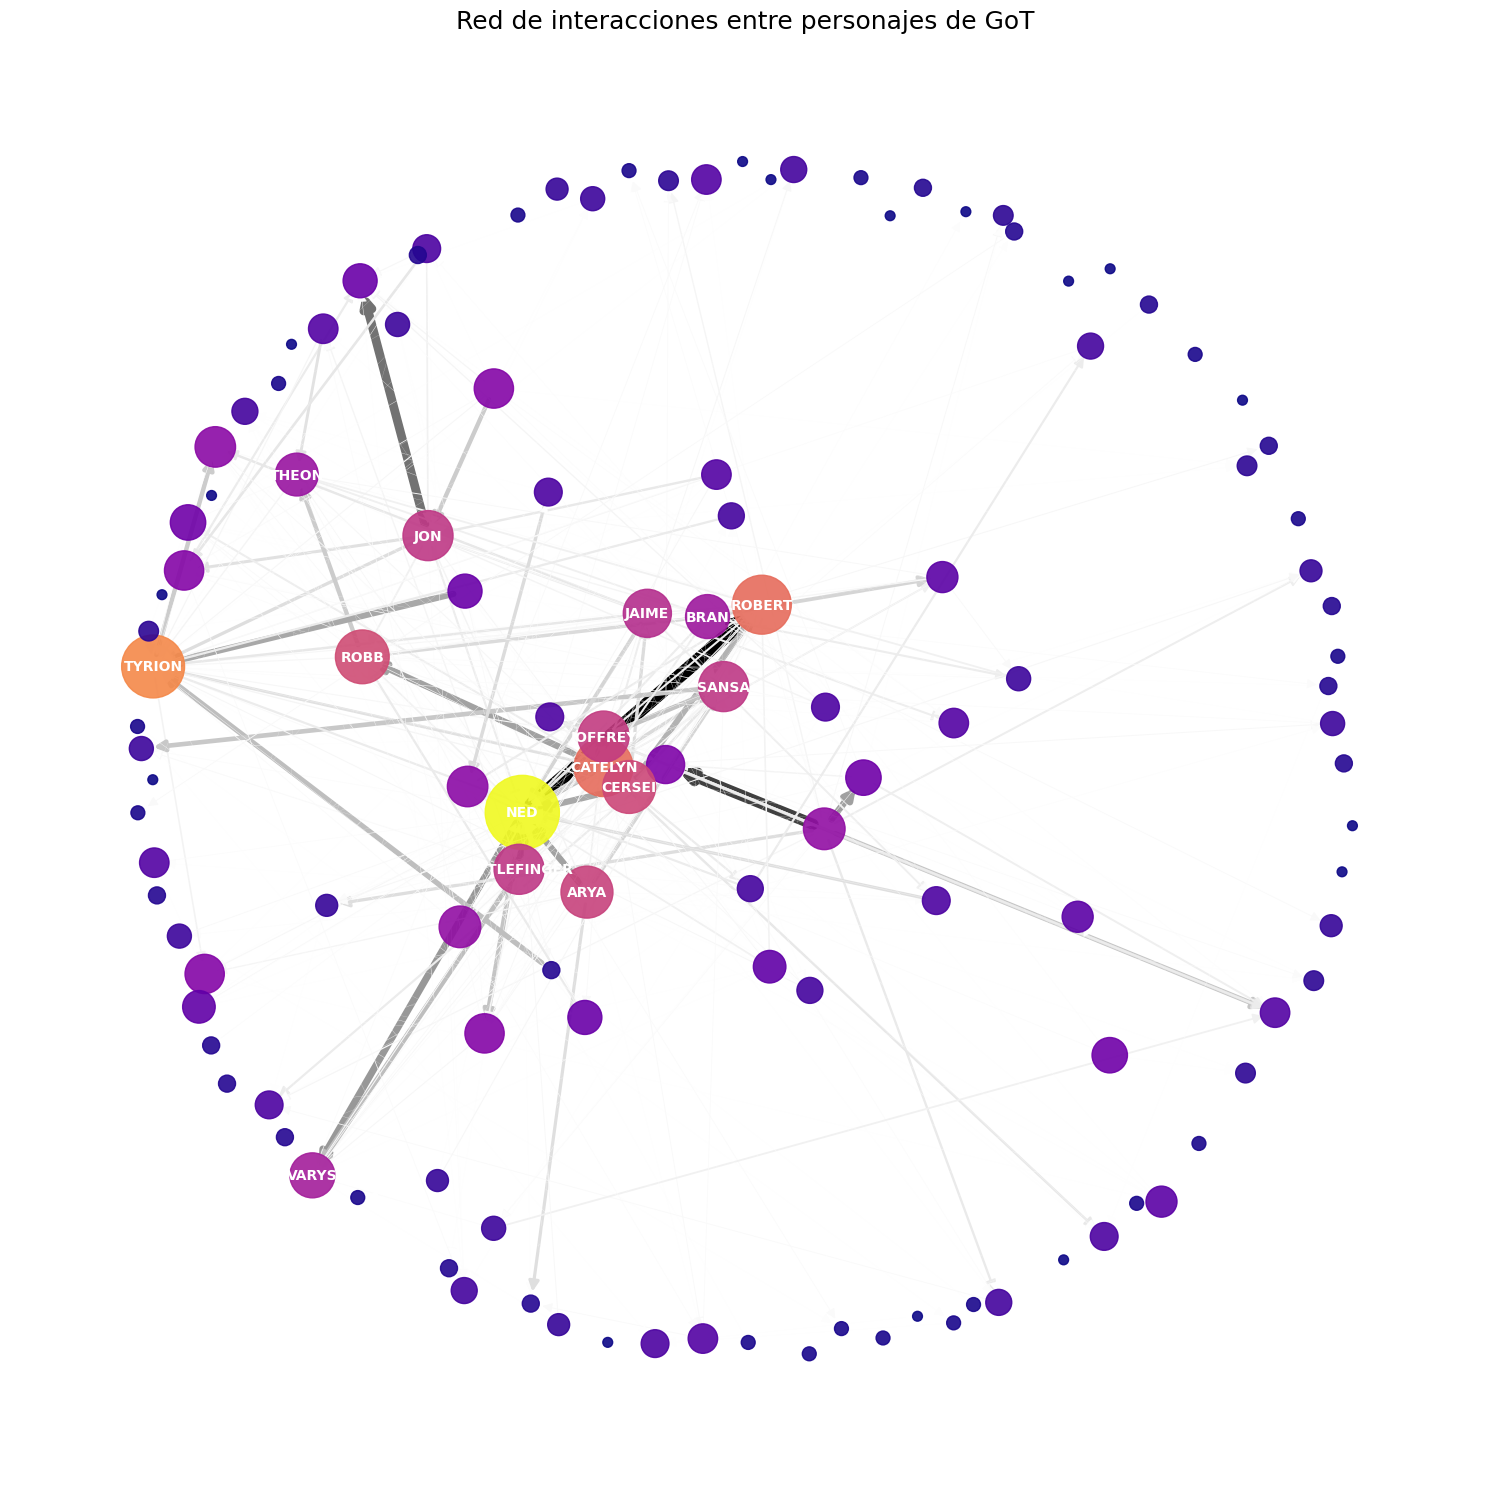

In [ ]:
#Cargar datos
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

degrees = dict(G.degree())
edges = G.edges(data=True)
weights = [d['weight'] for _, _, d in edges]
max_w = max(weights)
#Normaliza grosor
widths = [(w / max_w) * 10 for w in weights]
#Colorear nodos por grado
node_values = [degrees[n] for n in G.nodes()]

#Layout (Spring es disperso)
pos = nx.spring_layout(G, k=7.5, iterations=200, weight='weight', seed=42)

plt.figure(figsize=(15, 15))
plt.title('Red de interacciones entre personajes de GoT', fontsize=18)

#Dibujar nodos
nx.draw_networkx_nodes(
    G, pos,
    node_size=[v * 50 for v in degrees.values()],
    node_color=node_values,
    cmap=cm.plasma,
    alpha=0.9
)

#Dibujar aristas
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=widths,
    edge_color=weights,
    edge_cmap=cm.Greys,
    arrows=True,
    arrowsize=15,
    arrowstyle='-|>'
)

##Etiquetas (solo top 15 personajes)
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:15]
nx.draw_networkx_labels(
    G, pos,
    labels={n: n for n in top_nodes},
    font_size=10,
    font_color='white',
    font_weight='bold'
)

plt.axis('off')
plt.tight_layout()
plt.show()

# Algoritmos

## [Centralidad](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)

In [ ]:
#Grado
degrees = dict(G.degree())
degrees_sorted = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Grado:")
for node, degree in degrees_sorted[:5]:
    print(f"{node}: {degree}")

Top 5 Grado:
NED: 57
TYRION: 41
ROBERT: 36
CATELYN: 36
ROBB: 30


In [ ]:
#In-grado
in_degrees = dict(G.in_degree())
in_degrees_sorted = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)

print("Top 5 In-grado:")
for node, degree in in_degrees_sorted[:5]:
    print(f"{node}: {degree}")

Top 5 In-grado:
TYRION: 37
NED: 34
ROBERT: 28
SANSA: 22
ROBB: 21


In [ ]:
#Ex-grado
out_degrees = dict(G.out_degree())
out_degrees_sorted = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)

print("Top 5 ex-grado:")
for node, degree in out_degrees_sorted[:5]:
    print(f"{node}: {degree}")

Top 5 ex-grado:
CATELYN: 29
ARYA: 28
NED: 23
CERSEI: 23
JOFFREY: 18


Importancia de un nodo en base a la importancia de sus vecinos

Un nodo conectado a nodos “muy centrales” gana más centralidad que uno conectado a nodos periféricos.

In [ ]:
#Eigenvector
eigenvector = nx.eigenvector_centrality(G, weight='weight', max_iter=10000)
eigenvector_sorted = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Eigenvector:")
for node, centrality in eigenvector_sorted[:5]:
    print(f"{node}: {round(centrality,3)}")

Top 5 Eigenvector:
YOREN: 0.989
TYWIN: 0.146
VARYS: 0.005
TYSHA: 0.005
TYRION: 0.0


$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)},$

𝑢 → el nodo cuya centralidad estamos calculando.

𝑣 → todos los demás nodos de la red que son alcanzables desde 𝑢

𝑑(𝑣,𝑢) → la distancia más corta (shortest path) desde 𝑣 hasta 𝑢.

𝑛−1 → número de nodos alcanzables desde 𝑢.

Entre mas cerca de todos los nodos mayor será su centralidad.

In [ ]:
#Cercanía (Closeness)
closeness = nx.closeness_centrality(G)
closeness_sorted = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Cercanía:")
for node, centrality in closeness_sorted[:5]:
    print(f"{node}: {round(centrality,3)}")

Top 5 Cercanía:
TYRION: 0.418
VARYS: 0.363
TYWIN: 0.348
YOREN: 0.336
ROBERT: 0.301


$c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$

𝑉 → el conjunto de todos los nodos de la red.

𝑠,𝑡∈𝑉 → todos los pares de nodos distintos en la red.

Se calcula para cada par 𝑠 y 𝑡.

𝜎(𝑠,𝑡) → el número total de caminos más cortos (shortest paths) entre 𝑠 y 𝑡.

𝜎(𝑠,𝑡∣𝑣) → el número de caminos más cortos entre 𝑠 y 𝑡 que pasan por el nodo 𝑣.



Qué tan importante es un nodo para conectar a otros nodos a través de los caminos más cortos.

In [ ]:
#Intermediación (Betweenness, caminos cortos)
betweenness = nx.betweenness_centrality(G, weight='weight')
betweenness_sorted = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Intermediación:")
for node, centrality in betweenness_sorted[:5]:
    print(f"{node}: {round(centrality,3)}")

Top 5 Intermediación:
NED: 0.041
CATELYN: 0.02
JOFFREY: 0.018
JEOR: 0.015
ROBERT: 0.013


### Percolación

Qué tan importante es un nodo para la propagación de algo en la red

Simular fallas o bloqueos en una red

Ejemplo: Cierre de una avenida, una estación del metro.

Obs: Cuando todos los nodos tienen el mismo estado de percolación, la métrica se comporta igual que betweenness centrality.

In [ ]:
#Percolación (Betweenness) 2.0

H = nx.path_graph(4)

#Todos los nodos con percolation = 1 (igual a betweenness)
pc_all1 = nx.percolation_centrality(H, states={0:1, 1:1, 2:1, 3:1})

print("Caso 1 (todos activos):")
for n,v in pc_all1.items():
    print(f"Nodo {n}: {v:.3f}")

Caso 1 (todos activos):
Nodo 0: 0.000
Nodo 1: 0.667
Nodo 2: 0.667
Nodo 3: 0.000


In [ ]:
#Nodo central 1 con probabilidad de transmitir = 0.5
pc_half = nx.percolation_centrality(H, states={0:1, 1:0.5, 2:1, 3:1})

print("\nCaso 2 (nodo 1 a 50%):")
for n,v in pc_half.items():
    print(f"Nodo {n}: {v:.3f}")


Caso 2 (nodo 1 a 50%):
Nodo 0: 0.000
Nodo 1: 0.667
Nodo 2: 0.700
Nodo 3: 0.000


In [ ]:
#Nodo 1 bloqueado (percolation = 0)
pc_blocked = nx.percolation_centrality(H, states={0:1, 1:0, 2:1, 3:1})

print("\nCaso 3 (nodo 2 bloqueado):")
for n,v in pc_blocked.items():
    print(f"Nodo {n}: {v:.3f}")


Caso 3 (nodo 2 bloqueado):
Nodo 0: 0.000
Nodo 1: 0.667
Nodo 2: 0.750
Nodo 3: 0.000


## [Clustering](https://networkx.org/documentation/stable/reference/algorithms/clustering.html)

In [ ]:
#Triángulos
I = nx.complete_graph(9)

triangles = nx.triangles(I)
print("Triángulos por nodo:", triangles)
#En cuantos triangulos participa cada nodo (No implementado para redes dirigidas)

Triángulos por nodo: {0: 28, 1: 28, 2: 28, 3: 28, 4: 28, 5: 28, 6: 28, 7: 28, 8: 28}


$T = 3\frac{\#triangles}{\#triads}.$

Triada: Triangulos + A-B-C

Transitividad alta: La red es muy “cohesiva”, los grupos tienden a cerrarse.

Transitividad baja: Los nodos tienden a formar cadenas o caminos abiertos.

In [ ]:
#Transitividad
transitivity = nx.transitivity(G)

if transitivity == 0:
  print("No hay triángulos en la red, por lo que la transitividad es 0.")
else:
  print("Transitividad:", round(transitivity,3))

Transitividad: 0.211


Sin peso:

$c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},$

Con peso:

$c_u = \frac{1}{deg(u)(deg(u)-1))} \sum_{vw} (\hat{w}_{uv} \hat{w}_{uw} \hat{w}_{vw})^{1/3}.$

Qué tan conectados están los vecinos de un nodo entre sí.

In [ ]:
#Clustering (nodo)
clustering = nx.clustering(G)
clustering_sorted = sorted(clustering.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Clustering:")
for node, degree in clustering_sorted[:5]:
    print(f"{node}: {round(degree,3)}")

Top 5 Clustering:
SHAE: 0.5
MIRRI_MAZ_DUUR: 0.5
SYRIO_FOREL: 0.5
QOTHO: 0.5
SHAGGA: 0.5


Clustering promedio:

$C = \frac{1}{n}\sum_{v \in G} c_v,$

In [ ]:
#Clustering promedio (red)
avg_clustering = nx.average_clustering(G)
print("Clustering promedio:", round(avg_clustering,3))

Clustering promedio: 0.315


## [Analisis de Enlaces](https://networkx.org/documentation/stable/reference/algorithms/link_analysis.html)

Un nodo es importante si otros nodos importantes apuntan hacia él.

In [ ]:
#Pagerank
pagerank = nx.pagerank(G, weight='weight')
pagerank_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("Top 5 Pagerank:")
for node, centrality in pagerank_sorted[:5]:
    print(f"{node}: {round(centrality,3)}")

Top 5 Pagerank:
TYRION: 0.083
TYWIN: 0.063
YOREN: 0.047
SAM: 0.036
NED: 0.036


*Authorities* estima el valor del nodo basado en los enlaces entrantes.

*Hubs* estima el valor del nodo basado en los enlaces salientes.

In [ ]:
#HITS Hyperlink-Induced Topic Search
hits = nx.hits(G, max_iter=10000)
hubs = hits[0]
authorities = hits[1]

print("Top 5 Hubs:")
hubs_sorted = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
for node, centrality in hubs_sorted[:5]:
    print(f"{node}: {round(centrality,3)}")

print("\nTop 5 Authorities:")
authorities_sorted = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
for node, centrality in authorities_sorted[:5]:
    print(f"{node}: {round(centrality,3)}")

Top 5 Hubs:
NED: 0.156
CERSEI: 0.103
LITTLEFINGER: 0.083
CATELYN: 0.075
ARYA: 0.066

Top 5 Authorities:
ROBERT: 0.157
NED: 0.13
VARYS: 0.087
SANSA: 0.079
ROBB: 0.054


## [Métricas de distancia](https://networkx.org/documentation/stable/reference/algorithms/distance_measures.html)

La distancia más larga entre dos nodos en la red, usando caminos más cortos.

Si es dirigido entonces necesita estar fuertemente conectado.

In [ ]:
#Diametro
diameter = nx.diameter(G.to_undirected())
print("Diametro:", diameter)

Diametro: 6


Es la distancia máxima desde un nodo $v$ hasta todos los demás nodos en la red.

In [ ]:
#Excentricidad
eccentricity = nx.eccentricity(G.to_undirected())
eccentricity_sorted = sorted(eccentricity.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodos más centrales (menor excentricidad):")
for node, value in eccentricity_sorted[:5]:
    print(f"{node}: {value}")

Top 5 nodos más centrales (menor excentricidad):
IROGENIA: 6
MELESSA: 6
RANDYLL: 6
SAM: 5
SHAE: 5


Es la excentricidad mínima, la distancia máxima más pequeña desde algún nodo hasta todos los demás.

In [ ]:
#Radio
radius = nx.radius(G.to_undirected())
print("Radio:", radius)

Radio: 3


Nodos cuya centralidad es igual al radio de la red.

Si es dirigido entonces necesita estar fuertemente conectado.

In [ ]:
#Centro
center = nx.center(G.to_undirected())
print("Centro:", center)

Centro: ['NED', 'ROBERT', 'CATELYN', 'AERYS']


## [Densidad](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html)

In [ ]:
#Densidad
density = nx.density(G)
print("Densidad:", round(density,3))

Densidad: 0.5
